In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error


In [4]:
chor_training = pd.read_csv('Data/Final datasets/chor_training_data.csv')
cle_training = pd.read_csv('Data/Final datasets/cle_training_data.csv')
rod_training = pd.read_csv('Data/Final datasets/rod_training_data.csv')
turi_training = pd.read_csv('Data/Final datasets/turi_training_data.csv')

In [5]:
chor_training['Date'] = pd.to_datetime(chor_training['Date'])
cle_training['Date'] = pd.to_datetime(cle_training['Date'])
rod_training['Date'] = pd.to_datetime(rod_training['Date'])
turi_training['Date'] = pd.to_datetime(turi_training['Date'])

In [19]:
chor_training.interpolate(method='linear', inplace=True)
cle_training.interpolate(method='linear', inplace=True)
rod_training.interpolate(method='linear', inplace=True)
turi_training.interpolate(method='linear', inplace=True)


C:\Users\riven\AppData\Local\Temp\ipykernel_1564\1632482686.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  chor_training.interpolate(method='linear', inplace=True)
C:\Users\riven\AppData\Local\Temp\ipykernel_1564\1632482686.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  cle_training.interpolate(method='linear', inplace=True)
C:\Users\riven\AppData\Local\Temp\ipykernel_1564\1632482686.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  rod_training.interpolate(method='linear', inplace=True)
C:\Users\riven\AppData\Local\Temp\ipykernel_1564\1632482686.py:4: FutureWarning: DataFrame.interpolate with object dt

In [20]:
test_range = pd.date_range(start='2023-12-11', end='2023-12-17', freq='H')
train_range = pd.date_range(start='2023-12-04', end='2023-12-10', freq='H')

chor_training_test = chor_training[chor_training['Date'].isin(test_range)]
cle_training_test = cle_training[cle_training['Date'].isin(test_range)]
rod_training_test = rod_training[rod_training['Date'].isin(test_range)]
turi_training_test = turi_training[turi_training['Date'].isin(test_range)]

chor_training_train = chor_training[chor_training['Date'].isin(train_range)]
cle_training_train = cle_training[cle_training['Date'].isin(train_range)]
rod_training_train = rod_training[rod_training['Date'].isin(train_range)]
turi_training_train = turi_training[turi_training['Date'].isin(train_range)]


C:\Users\riven\AppData\Local\Temp\ipykernel_1564\2613009118.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  test_range = pd.date_range(start='2023-12-11', end='2023-12-17', freq='H')
C:\Users\riven\AppData\Local\Temp\ipykernel_1564\2613009118.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  train_range = pd.date_range(start='2023-12-04', end='2023-12-10', freq='H')


In [21]:
chor_training_train = chor_training_train.reset_index(drop=True)
cle_training_train = cle_training_train.reset_index(drop=True)
rod_training_train = rod_training_train.reset_index(drop=True)
turi_training_train = turi_training_train.reset_index(drop=True)

chor_training_test = chor_training_test.reset_index(drop=True)
cle_training_test = cle_training_test.reset_index(drop=True)
rod_training_test = rod_training_test.reset_index(drop=True)
turi_training_test = turi_training_test.reset_index(drop=True)


In [ ]:
chor

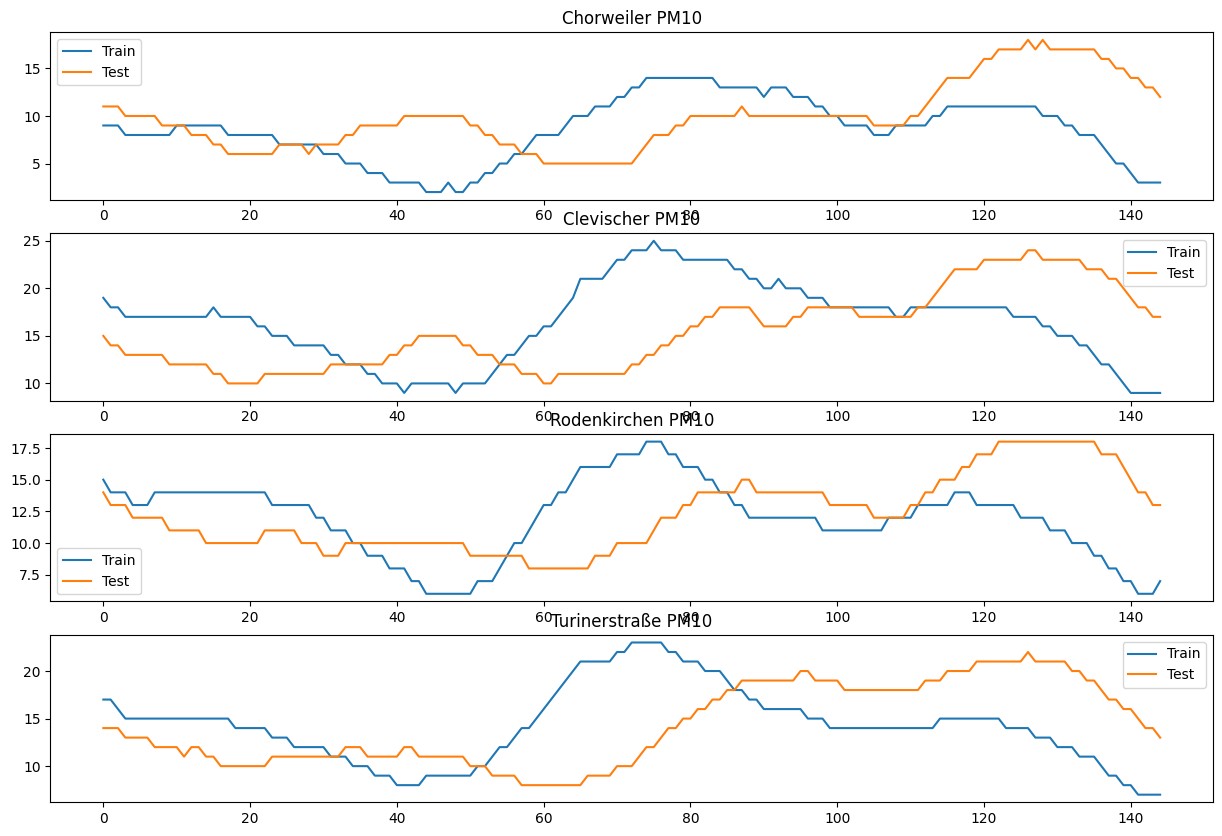

Mean Squared Error for Chorweiler PM10: 23.910344827586208
Mean Squared Error for Clevischer PM10: 34.44137931034483
Mean Squared Error for Rodenkirchen PM10: 18.427586206896553
Mean Squared Error for Turinerstraße PM10: 34.62068965517241
R2 Score for Chorweiler PM10: -1.191720800453416
R2 Score for Clevischer PM10: -0.9659815925935977
R2 Score for Rodenkirchen PM10: -1.0492531629501123
R2 Score for Turinerstraße PM10: -1.1770860126934375
RMSE for Chorweiler PM10: 4.889820531224659
RMSE for Clevischer PM10: 5.868677816198877
RMSE for Rodenkirchen PM10: 4.29273644740701
RMSE for Turinerstraße PM10: 5.883934878563189


In [17]:
#plot train and test PM10 values
fig, ax = plt.subplots(4,1, figsize=(15, 10))

ax[0].plot(chor_training_train.index,chor_training_train['PM_10'], label='Train')

ax[1].plot(cle_training_train.index, cle_training_train['PM_10'], label='Train')

ax[2].plot(cle_training_train.index,rod_training_train['PM_10'], label='Train')

ax[3].plot(turi_training_train.index,turi_training_train['PM_10'], label='Train')


ax[0].plot(chor_training_test.index,chor_training_test['PM_10'], label='Test')
ax[0].set_title('Chorweiler PM10')
ax[0].legend()

ax[1].plot(cle_training_train.index,cle_training_test['PM_10'], label='Test')
ax[1].set_title('Clevischer PM10')
ax[1].legend()

ax[2].plot(rod_training_train.index,rod_training_test['PM_10'], label='Test')
ax[2].set_title('Rodenkirchen PM10')
ax[2].legend()

ax[3].plot(turi_training_train.index,turi_training_test['PM_10'], label='Test')
ax[3].set_title('Turinerstraße PM10')
ax[3].legend()

plt.show()



mean_squared_error_chor_pm10 = mean_squared_error(chor_training_train['PM_10'], chor_training_test['PM_10'])

mean_squared_error_cle_pm10 = mean_squared_error(cle_training_train['PM_10'], cle_training_test['PM_10'])

mean_squared_error_rod_pm10 = mean_squared_error(rod_training_train['PM_10'], rod_training_test['PM_10'])

mean_squared_error_turi_pm10 = mean_squared_error(turi_training_train['PM_10'], turi_training_test['PM_10'])

print(f'Mean Squared Error for Chorweiler PM10: {mean_squared_error_chor_pm10}')
print(f'Mean Squared Error for Clevischer PM10: {mean_squared_error_cle_pm10}')
print(f'Mean Squared Error for Rodenkirchen PM10: {mean_squared_error_rod_pm10}')
print(f'Mean Squared Error for Turinerstraße PM10: {mean_squared_error_turi_pm10}')

r2_score_chor_pm10 = r2_score(chor_training_train['PM_10'], chor_training_test['PM_10'])

r2_score_cle_pm10 = r2_score(cle_training_train['PM_10'], cle_training_test['PM_10'])

r2_score_rod_pm10 = r2_score(rod_training_train['PM_10'], rod_training_test['PM_10'])

r2_score_turi_pm10 = r2_score(turi_training_train['PM_10'], turi_training_test['PM_10'])

print(f'R2 Score for Chorweiler PM10: {r2_score_chor_pm10}')
print(f'R2 Score for Clevischer PM10: {r2_score_cle_pm10}')
print(f'R2 Score for Rodenkirchen PM10: {r2_score_rod_pm10}')
print(f'R2 Score for Turinerstraße PM10: {r2_score_turi_pm10}')

rmse_chor_pm10 = np.sqrt(mean_squared_error_chor_pm10)
rmse_cle_pm10 = np.sqrt(mean_squared_error_cle_pm10)
rmse_rod_pm10 = np.sqrt(mean_squared_error_rod_pm10)
rmse_turi_pm10 = np.sqrt(mean_squared_error_turi_pm10)

print(f'RMSE for Chorweiler PM10: {rmse_chor_pm10}')
print(f'RMSE for Clevischer PM10: {rmse_cle_pm10}')
print(f'RMSE for Rodenkirchen PM10: {rmse_rod_pm10}')
print(f'RMSE for Turinerstraße PM10: {rmse_turi_pm10}')









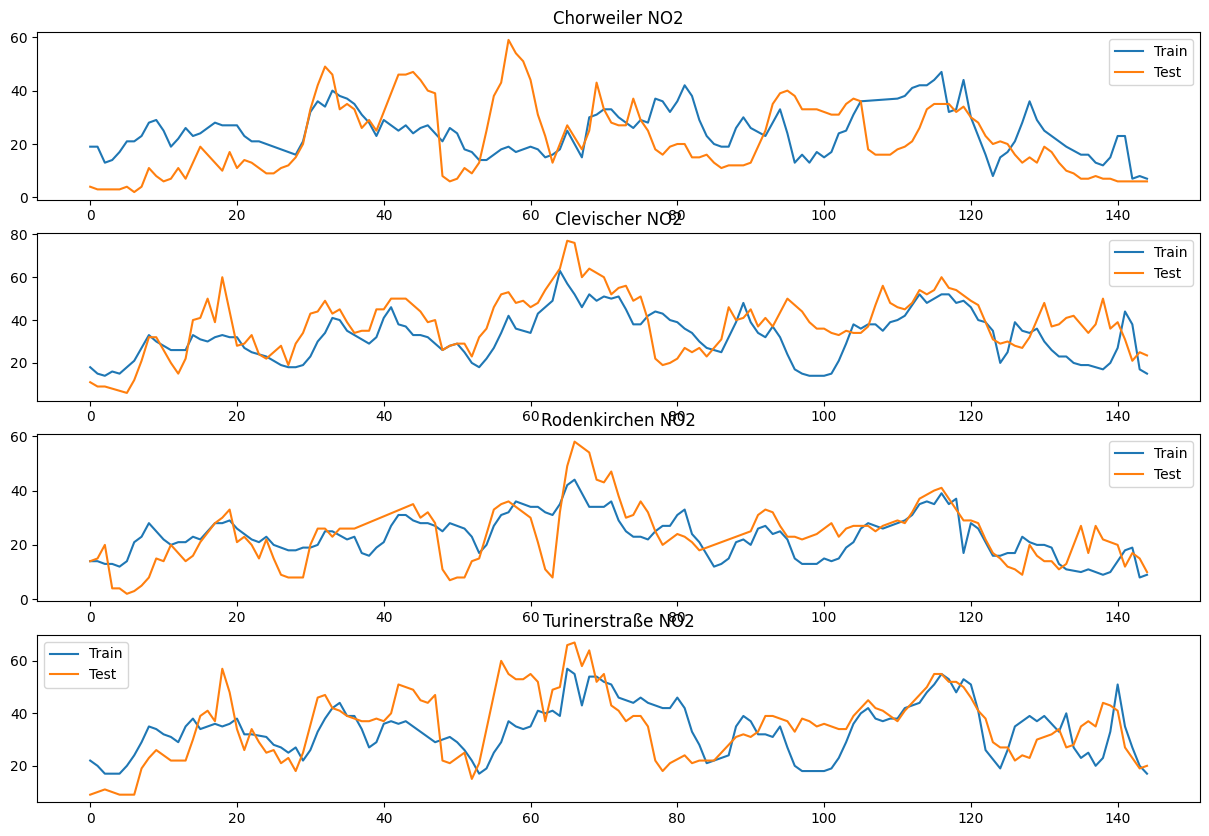

Mean Squared Error for Chorweiler NO2: 186.05620689655174
Mean Squared Error for Clevischer NO2: 146.76379310344828
Mean Squared Error for Rodenkirchen NO2: 70.76163793103449
Mean Squared Error for Turinerstraße NO2: 110.76551724137931
R2 Score for Chorweiler NO2: -1.6014596265960148
R2 Score for Clevischer NO2: -0.22544363976022552
R2 Score for Rodenkirchen NO2: -0.21796326086200146
R2 Score for Turinerstraße NO2: -0.16420333872148563
RMSE for Chorweiler NO2: 13.640242186139941
RMSE for Clevischer NO2: 12.114610728514899
RMSE for Rodenkirchen NO2: 8.41199369537534
RMSE for Turinerstraße NO2: 10.524519810489185


In [22]:
fig, ax = plt.subplots(4,1, figsize=(15, 10))

ax[0].plot(chor_training_train.index,chor_training_train['NO2'], label='Train')
ax[1].plot(cle_training_train.index, cle_training_train['NO2'], label='Train')
ax[2].plot(cle_training_train.index,rod_training_train['NO2'], label='Train')
ax[3].plot(turi_training_train.index,turi_training_train['NO2'], label='Train')


ax[0].plot(chor_training_test.index,chor_training_test['NO2'], label='Test')
ax[0].set_title('Chorweiler NO2')
ax[0].legend()

ax[1].plot(cle_training_train.index,cle_training_test['NO2'], label='Test')
ax[1].set_title('Clevischer NO2')
ax[1].legend()

ax[2].plot(rod_training_train.index,rod_training_test['NO2'], label='Test')
ax[2].set_title('Rodenkirchen NO2')
ax[2].legend()

ax[3].plot(turi_training_train.index,turi_training_test['NO2'], label='Test')
ax[3].set_title('Turinerstraße NO2')
ax[3].legend()

plt.show()




mean_squared_error_chor_no2 = mean_squared_error(chor_training_train['NO2'], chor_training_test['NO2'])
mean_squared_error_cle_no2 = mean_squared_error(cle_training_train['NO2'], cle_training_test['NO2'])
mean_squared_error_rod_no2 = mean_squared_error(rod_training_train['NO2'], rod_training_test['NO2'])
mean_squared_error_turi_no2 = mean_squared_error(turi_training_train['NO2'], turi_training_test['NO2'])

print(f'Mean Squared Error for Chorweiler NO2: {mean_squared_error_chor_no2}')
print(f'Mean Squared Error for Clevischer NO2: {mean_squared_error_cle_no2}')
print(f'Mean Squared Error for Rodenkirchen NO2: {mean_squared_error_rod_no2}')
print(f'Mean Squared Error for Turinerstraße NO2: {mean_squared_error_turi_no2}')

r2_score_chor_no2 = r2_score(chor_training_train['NO2'], chor_training_test['NO2'])
r2_score_cle_no2 = r2_score(cle_training_train['NO2'], cle_training_test['NO2'])
r2_score_rod_no2 = r2_score(rod_training_train['NO2'], rod_training_test['NO2'])
r2_score_turi_no2 = r2_score(turi_training_train['NO2'], turi_training_test['NO2'])

print(f'R2 Score for Chorweiler NO2: {r2_score_chor_no2}')
print(f'R2 Score for Clevischer NO2: {r2_score_cle_no2}')
print(f'R2 Score for Rodenkirchen NO2: {r2_score_rod_no2}')
print(f'R2 Score for Turinerstraße NO2: {r2_score_turi_no2}')


rmse_chor_no2 = np.sqrt(mean_squared_error_chor_no2)
rmse_cle_no2 = np.sqrt(mean_squared_error_cle_no2)
rmse_rod_no2 = np.sqrt(mean_squared_error_rod_no2)
rmse_turi_no2 = np.sqrt(mean_squared_error_turi_no2)

print(f'RMSE for Chorweiler NO2: {rmse_chor_no2}')
print(f'RMSE for Clevischer NO2: {rmse_cle_no2}')
print(f'RMSE for Rodenkirchen NO2: {rmse_rod_no2}')
print(f'RMSE for Turinerstraße NO2: {rmse_turi_no2}')



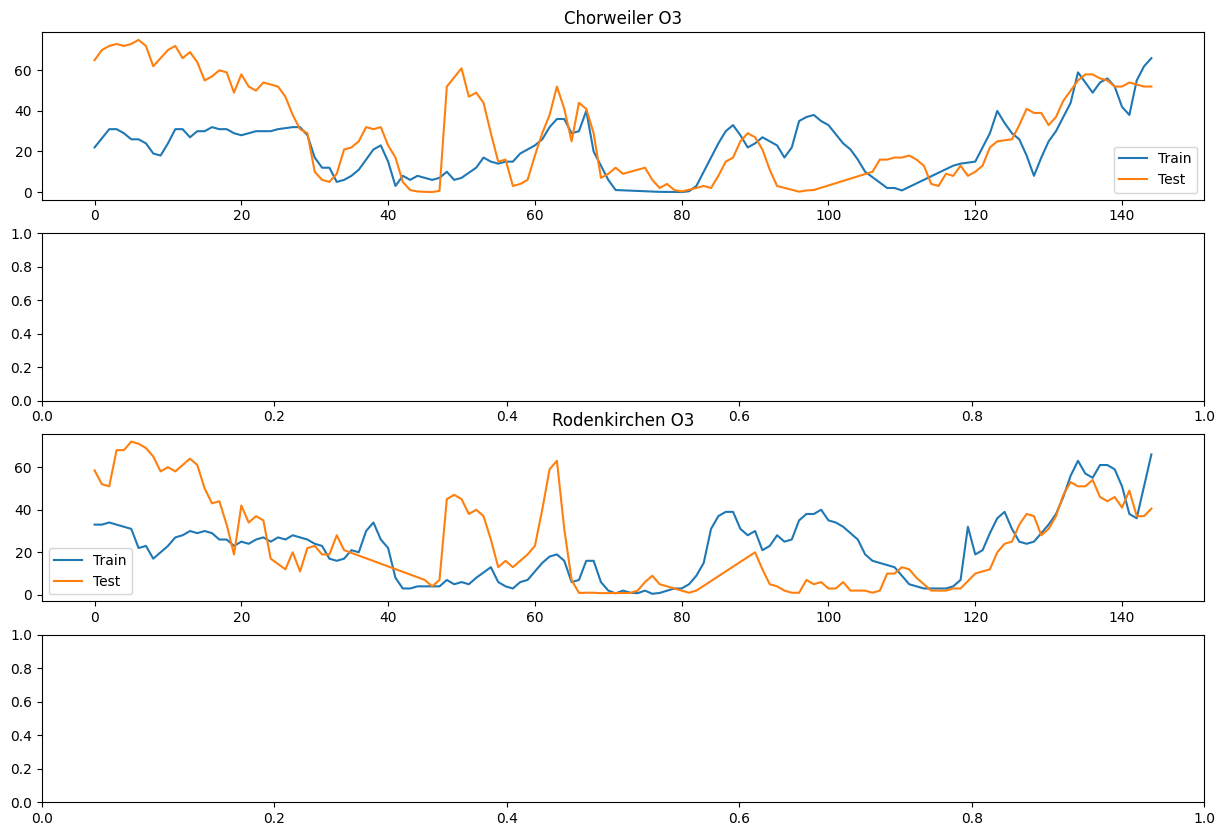

Mean Squared Error for Chorweiler O3: 439.39955610290093
Mean Squared Error for Rodenkirchen O3: 378.91315673981194
R2 Score for Chorweiler O3: -1.0867176171611757
R2 Score for Rodenkirchen O3: -0.62697357461138
RMSE for Chorweiler O3: 20.961859557369927
RMSE for Rodenkirchen O3: 19.465691786828742


In [24]:
fig, ax = plt.subplots(4,1, figsize=(15, 10))

ax[0].plot(chor_training_train.index,chor_training_train['O3'], label='Train')

ax[2].plot(cle_training_train.index,rod_training_train['O3'], label='Train')



ax[0].plot(chor_training_test.index,chor_training_test['O3'], label='Test')
ax[0].set_title('Chorweiler O3')
ax[0].legend()



ax[2].plot(rod_training_train.index,rod_training_test['O3'], label='Test')
ax[2].set_title('Rodenkirchen O3')
ax[2].legend()


plt.show()


mean_squared_error_chor_o3 = mean_squared_error(chor_training_train['O3'], chor_training_test['O3'])

mean_squared_error_rod_o3 = mean_squared_error(rod_training_train['O3'], rod_training_test['O3'])


print(f'Mean Squared Error for Chorweiler O3: {mean_squared_error_chor_o3}')

print(f'Mean Squared Error for Rodenkirchen O3: {mean_squared_error_rod_o3}')


r2_score_chor_o3 = r2_score(chor_training_train['O3'], chor_training_test['O3'])

r2_score_rod_o3 = r2_score(rod_training_train['O3'], rod_training_test['O3'])


print(f'R2 Score for Chorweiler O3: {r2_score_chor_o3}')

print(f'R2 Score for Rodenkirchen O3: {r2_score_rod_o3}')


rmse_chor_o3 = np.sqrt(mean_squared_error_chor_o3)

rmse_rod_o3 = np.sqrt(mean_squared_error_rod_o3)


print(f'RMSE for Chorweiler O3: {rmse_chor_o3}')

print(f'RMSE for Rodenkirchen O3: {rmse_rod_o3}')


